# SDO 2025 Science Workshop: DKIST User Tools Presentation

### Alisdair Davey, DKIST Data Center Scientist, adavey@nso.edu
This notebook is based off of the information given in the [DKIST Python Tools Documentation](https://docs.dkist.nso.edu/projects/python-tools/en/stable/). The DKIST User Tools were written by Stuart Mumford and Drew Leonard and are integrated with SunPy. This notebook does not attempt to cover any of the of the installation and setup information which is detailed in the User Tools documentation for example. You are strongly encouraged to make use of the information there and if you have any issues please bring them to the [DKIST Chat Room](https://app.element.io/?updated=1.11.46#/room/#dki-solar-telescope:openastronomy.org) where you will be able to get help with all aspects of the DKIST Python User Tools from Stuart and Others. In addition to the chat room, should you find any issues using the tools or the data from DKIST you are strongly encouraged to report this to the Data Center using the [DKIST Data Center Help Desk](https://nso.atlassian.net/servicedesk/customer/portal/8). This notebook assumes you have a functional python environment and *sunpy* and *dkist* packages installed.

## Searching for DKIST Datasets

Each dataset comprises a number of different files:
- An ASDF file containing all the metadata, and no data.
- A quality report PDF.
- An mp4 preview movie.
- A (large) number of FITS files, each containing a “calibrated exposure”.

The ASDF, quality report and preview movie can all be downloaded without authenticating, the FITS files require the use of Globus.

In [20]:
import dkist.net
import astropy.units as u
from sunpy.net import Fido, attrs as a

This presentation uses data from proposal pid_2_114 and in particular VBI dataset AJQWW. This proposal includes DKIST observations taken in coordination with Solar Orbiter Remote Science Window#11 planned for 2023-10-12 to 2023-10-19. It was one of three experiments proposed for execution during this window, to create community data sets that advance DKIST’s science mission collaboratively with Solar Orbiter.

In [42]:
Fido.search(a.dkist.Proposal("pid_2_114"))

Start Time,End Time,Instrument,Wavelength,Bounding Box,Dataset ID,Dataset Size,Exposure Time,Primary Experiment ID,Primary Proposal ID,Stokes Parameters,Target Types,productId,Number of Frames,Average Fried Parameter,Average Polarimetric Accuracy,Embargoed,Downloadable,isManuallyProcessed,Has Spectral Axis,Has Temporal Axis,Average Spectral Sampling,Average Spatial Sampling,Average Temporal Sampling,Status,spectralLines
,,,nm,,,Gibyte,s,,,,,,,,,,,,,,nm,arcsec,s,,
Time,Time,str4,float64[2],str34,str6,float64,float64,str9,str9,str4,str7[1],object,int64,float64,object,bool,bool,object,bool,bool,float64,float64,float64,str6,object
2023-10-16T22:02:47.512,2023-10-16T22:03:21.326,VISP,853.7002737559743 .. 854.6361356847904,"(-69.98,102.6),(-141.63,53.6)",ALDLJ,2.53852039575577,14.995605633802818,eid_2_114,pid_2_114,I,sunspot,None,1345,0.020101328924334076,None,False,True,None,True,True,0.000999852488051306,0.03647318432948004,16.906828252790408,ACTIVE,['Ca II (854.21 nm)']
2023-10-16T22:02:47.512,2023-10-16T22:03:21.326,VISP,589.0781010152846 .. 590.1252361761552,"(-69.96,113.1),(-141.32,52.66)",AJQJL,2.73154020309448,14.995605633802818,eid_2_114,pid_2_114,I,sunspot,None,1345,0.020101328924334076,None,False,True,None,True,True,0.001052397146603632,0.038632388008526995,16.906828252790408,ACTIVE,['Na I D1 (589.59 nm)']
2023-10-16T22:02:47.509,2023-10-16T22:03:21.323,VISP,629.4184702795845 .. 631.0111021423852,"(-69.93,120.56),(-141.56,45.4)",AKPKJ,2.70663857460022,10.098704225352112,eid_2_114,pid_2_114,I,sunspot,None,1345,0.020101328924334076,None,False,True,None,True,True,0.00162513455387821,0.04157151978539038,16.906828252786227,ACTIVE,"['Fe I (630.15 nm)', 'Fe I (630.25 nm)']"
2023-10-16T18:51:04.688,2023-10-16T19:01:33.059,VISP,589.0781010152846 .. 590.1241837790086,"(-162.58,111.7),(-186.45,51.53)",BMENL,1.84422522783279,149.9560563380282,eid_2_114,pid_2_114,IQUV,sunspot,None,896,2.136827470638298,0.9602817314830018,False,True,None,True,True,0.001052397146603632,0.06524726478204633,314.18564285715166,ACTIVE,['Na I D1 (589.59 nm)']
2023-10-16T18:51:04.688,2023-10-16T19:01:33.059,VISP,853.7012736084624 .. 854.6361356847904,"(-162.6,101.22),(-186.53,52.5)",BOJEX,1.70484691858292,149.9560563380282,eid_2_114,pid_2_114,IQUV,sunspot,None,896,2.136827470638298,0.9659906375776222,False,True,None,True,True,0.000999852488051306,0.06322087040848474,314.18564285715166,ACTIVE,['Ca II (854.21 nm)']
2023-10-17T00:03:31.695,2023-10-17T00:13:29.071,VISP,589.0781010152846 .. 590.1241837790086,"(-30.17,122.37),(-52.87,62.2)",ANGZL,1.75673693418503,149.9560563380282,eid_2_114,pid_2_114,IQUV,sunspot,None,852,0.5911127672934464,0.9525387993854021,False,True,None,True,True,0.001052397146603632,0.06524726478204633,298.6876455399083,ACTIVE,['Na I D1 (589.59 nm)']
2023-10-17T00:03:31.671,2023-10-17T00:13:29.046,VISP,629.4184702795845 .. 631.0094770078313,"(-30.15,129.82),(-52.98,54.94)",AOJVX,1.75909727811813,100.98704225352112,eid_2_114,pid_2_114,IQUV,sunspot,None,852,0.5911127672934464,0.9160141704563671,False,True,None,True,True,0.00162513455387821,0.0682601431143153,298.6876455399067,ACTIVE,"['Fe I (630.15 nm)', 'Fe I (630.25 nm)']"
2023-10-16T18:21:47.697,2023-10-16T18:41:42.447,VISP,853.7012736084624 .. 854.6361356847904,"(-182.21,101.1),(-227.47,52.26)",BLDMN,3.26060324907303,149.9560563380282,eid_2_114,pid_2_114,IQUV,sunspot,None,1700,0.0843253860226449,0.9589515433987699,False,True,None,True,True,0.000999852488051306,0.06322087040848474,597.3750776470547,ACTIVE,['Ca II (854.21 nm)']


See [Reference/API](https://docs.dkist.nso.edu/projects/python-tools/en/stable/reference.html) for a full list of attributes you can search data on.

In [43]:
res = Fido.search(a.dkist.Proposal("pid_2_114") & a.Instrument.vbi)
res[0]

Start Time,End Time,Instrument,Wavelength,Bounding Box,Dataset ID,Dataset Size,Exposure Time,Primary Experiment ID,Primary Proposal ID,Stokes Parameters,Target Types,productId,Number of Frames,Average Fried Parameter,Embargoed,Downloadable,isManuallyProcessed,Has Spectral Axis,Has Temporal Axis,Average Spectral Sampling,Average Spatial Sampling,Average Temporal Sampling,Status,spectralLines
,,,nm,,,Gibyte,s,,,,,,,,,,,,,nm,arcsec,s,,
Time,Time,str3,float64[2],str33,str6,float64,float64,str9,str9,str1,str7[1],object,int64,float64,bool,bool,object,bool,bool,float64,float64,float64,str6,object
2023-10-16T18:16:13.360,2023-10-16T18:19:52.720,VBI,450.0 .. 450.0,"(-146.45,139.83),(-262.68,21)",AZYQR,0.371563732624054,0.301,eid_2_114,pid_2_114,I,sunspot,None,27,0.07432360035170049,False,True,None,False,True,nan,0.010098433122038841,109.67999999998952,ACTIVE,None
2023-10-16T18:16:40.782,2023-10-16T18:18:30.462,VBI,486.0 .. 486.0,"(-146.45,139.83),(-262.68,21)",BDDXM,0.23383766412735,3.4909999999999997,eid_2_114,pid_2_114,I,sunspot,None,18,0.08312459556201757,False,True,None,False,True,nan,0.010098433122038841,109.6800000000087,ACTIVE,['H beta (486.13 nm)']
2023-10-16T18:45:19.360,2023-10-16T18:48:58.720,VBI,450.0 .. 450.0,"(-105.54,140.06),(-221.72,21.24)",AJQWW,0.399053692817688,0.301,eid_2_114,pid_2_114,I,sunspot,None,27,0.10735269164860523,False,True,None,False,True,nan,0.010098433122038841,109.67999899999903,ACTIVE,None
2023-10-16T18:15:45.953,2023-10-16T18:19:25.313,VBI,393.0 .. 393.0,"(-146.45,139.83),(-262.68,21)",AXYOP,0.366526544094086,25.007,eid_2_114,pid_2_114,I,sunspot,None,27,0.08007350900109346,False,True,None,False,True,nan,0.010098433122038841,109.67999899999903,ACTIVE,['Ca II K (393.37 nm)']
2023-10-16T18:15:18.520,2023-10-16T18:18:57.880,VBI,430.0 .. 430.0,"(-146.45,139.83),(-262.68,21)",AYYPZ,0.372097492218018,0.6970000000000001,eid_2_114,pid_2_114,I,sunspot,None,27,0.0861385438772678,False,True,None,False,True,nan,0.010098433122038841,109.67999899999903,ACTIVE,None
2023-10-16T19:37:47.782,2023-10-16T19:41:27.142,VBI,486.0 .. 486.0,"(-57.14,140.06),(-173.28,21.24)",AOJWX,0.353040397167206,3.4909999999999997,eid_2_114,pid_2_114,I,sunspot,None,27,0.04185259303760414,False,True,None,False,True,nan,0.010098433122038841,109.6800009999992,ACTIVE,['H beta (486.13 nm)']
2023-10-16T20:12:04.953,2023-10-16T20:15:44.313,VBI,393.0 .. 393.0,"(-21.64,147.96),(-137.77,29.13)",APMXE,0.373395681381226,25.007,eid_2_114,pid_2_114,I,sunspot,None,27,0.05603877723923683,False,True,None,False,True,nan,0.010098433122038841,109.67999899999903,ACTIVE,['Ca II K (393.37 nm)']
2023-10-16T18:44:51.953,2023-10-16T18:48:31.313,VBI,393.0 .. 393.0,"(-105.54,140.06),(-221.72,21.24)",BEEWM,0.372483730316162,25.007,eid_2_114,pid_2_114,I,sunspot,None,27,0.09587550450851562,False,True,None,False,True,nan,0.010098433122038841,109.67999999999911,ACTIVE,['Ca II K (393.37 nm)']


We can do some sorting and filtering using this table. For instance, if we are interested in choosing data with a particular 
value, we can show only that column plus a few to help us identify the data.

In [44]:
res[0]["Dataset ID", "Instrument", "Wavelength", "Start Time", "Average Fried Parameter"][:-10]

Dataset ID,Instrument,Wavelength,Start Time,Average Fried Parameter
,,nm,,
str6,str3,float64[2],Time,float64
AZYQR,VBI,450.0 .. 450.0,2023-10-16T18:16:13.360,0.07432360035170049
BDDXM,VBI,486.0 .. 486.0,2023-10-16T18:16:40.782,0.08312459556201757
AJQWW,VBI,450.0 .. 450.0,2023-10-16T18:45:19.360,0.10735269164860523
AXYOP,VBI,393.0 .. 393.0,2023-10-16T18:15:45.953,0.08007350900109346
AYYPZ,VBI,430.0 .. 430.0,2023-10-16T18:15:18.520,0.0861385438772678
AOJWX,VBI,486.0 .. 486.0,2023-10-16T19:37:47.782,0.04185259303760414
APMXE,VBI,393.0 .. 393.0,2023-10-16T20:12:04.953,0.05603877723923683
BEEWM,VBI,393.0 .. 393.0,2023-10-16T18:44:51.953,0.09587550450851562


or sort based on the average Fried parameter column, showing the same columns as before. Perhaps this is part of the reason these datasets were chosen, the average seeing is pretty good.

In [45]:
res[0].sort("Average Fried Parameter")
res[0]["Dataset ID", "Instrument", "Wavelength", "Start Time", "Average Fried Parameter"][80:91]

Dataset ID,Instrument,Wavelength,Start Time,Average Fried Parameter
,,nm,,
str6,str3,float64[2],Time,float64
BXJJP,VBI,450.0 .. 450.0,2024-04-17T20:25:19.337,0.08983175529462115
AGJZM,VBI,430.0 .. 430.0,2023-10-16T18:44:24.520,0.09319014484990822
ADJJM,VBI,450.0 .. 450.0,2024-04-17T21:30:51.777,0.09364266934392573
BEEWM,VBI,393.0 .. 393.0,2023-10-16T18:44:51.953,0.09587550450851562
BWGGV,VBI,450.0 .. 450.0,2024-04-17T21:08:40.337,0.09817869849924714
AEKKM,VBI,450.0 .. 450.0,2024-04-17T21:00:39.777,0.10157442466064683
AKPWX,VBI,486.0 .. 486.0,2023-10-16T18:45:46.782,0.10542728491527792
AJQWW,VBI,450.0 .. 450.0,2023-10-16T18:45:19.360,0.10735269164860523


In [25]:
res = Fido.search(a.Time("2023/10/16 18:45:00", "2023/10/16 18:50:00") & a.Instrument.vbi)
res

Start Time,End Time,Instrument,Wavelength,Bounding Box,Dataset ID,Dataset Size,Exposure Time,Primary Experiment ID,Primary Proposal ID,Stokes Parameters,Target Types,Number of Frames,Average Fried Parameter,Embargoed,Downloadable,Has Spectral Axis,Has Temporal Axis,Average Spectral Sampling,Average Spatial Sampling,Average Temporal Sampling,Status,spectralLines
,,,nm,,,Gibyte,s,,,,,,,,,,,nm,arcsec,s,,
Time,Time,str3,float64[2],str32,str5,float64,float64,str9,str9,str1,str7[1],int64,float64,bool,bool,bool,bool,float64,float64,float64,str6,object
2023-10-16T18:45:19.360,2023-10-16T18:48:58.720,VBI,450.0 .. 450.0,"(-105.54,140.06),(-221.72,21.24)",AJQWW,0.399053692817688,0.301,eid_2_114,pid_2_114,I,sunspot,27,0.10735269164860523,False,True,False,True,nan,0.010098433122038841,109.67999899999903,ACTIVE,None
2023-10-16T18:44:51.953,2023-10-16T18:48:31.313,VBI,393.0 .. 393.0,"(-105.54,140.06),(-221.72,21.24)",BEEWM,0.372483730316162,25.007,eid_2_114,pid_2_114,I,sunspot,27,0.09587550450851562,False,True,False,True,nan,0.010098433122038841,109.67999999999911,ACTIVE,['Ca II K (393.37 nm)']
2023-10-16T18:44:24.520,2023-10-16T18:49:53.560,VBI,430.0 .. 430.0,"(-105.54,140.06),(-221.72,21.24)",AGJZM,0.516124069690704,0.6970000000000001,eid_2_114,pid_2_114,I,sunspot,36,0.09319014484990822,False,True,False,True,nan,0.010098433122038841,109.6800009999992,ACTIVE,None
2023-10-16T18:45:46.782,2023-10-16T18:49:26.142,VBI,486.0 .. 486.0,"(-105.54,140.06),(-221.72,21.24)",AKPWX,0.363943576812744,3.4909999999999997,eid_2_114,pid_2_114,I,sunspot,27,0.10542728491527792,False,True,False,True,nan,0.010098433122038841,109.6800009999992,ACTIVE,['H beta (486.13 nm)']


## Downloading the ASDF File
Only the ASDF files can be downloaded with Fido. You need to use Globus if you want to download the FITS files containing the data. Let's look at one of the ViSP data sets from pid_2_114.

In [26]:
res = Fido.search(a.dkist.Dataset("BKPLX"))
asdf_file = Fido.fetch(res, path="~/DKISTDownloads/Workshop/{instrument}/{dataset_id}/")
asdf_file

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['/Users/alisdair/DKISTDownloads/Workshop/VISP/BKPLX/VISP_L1_20231016T182147_BKPLX_metadata.asdf']

## Dataset Object
We can use this ASDF file to construct a Dataset object. The Dataset object allows us to do some basic inspection of the dataset as a whole without having to download the entire thing, using the metadata in the FITS headers. This will save users time in that they can then only download the data they want, and it also eases the load on the DKIST Data Center servers.

In [27]:
ds = dkist.load_dataset(asdf_file)
ds

/Users/alisdair/anaconda3/anaconda3/lib/python3.12/site-packages/asdf/_asdf.py:310: AsdfPackageVersionWarning: File 'file:///Users/alisdair/DKISTDownloads/Workshop/VISP/BKPLX/VISP_L1_20231016T182147_BKPLX_metadata.asdf' was created with extension URI 'asdf://asdf-format.org/astronomy/gwcs/extensions/gwcs-1.2.0' (from package gwcs==0.24.0), but older package (gwcs==0.21.0) is installed.
  warnings.warn(msg, AsdfPackageVersionWarning)


This VISP Dataset BKPLX consists of 1700 frames.
Files are stored in /Users/alisdair/DKISTDownloads/Workshop/VISP/BKPLX

This Dataset has 4 pixel and 5 world dimensions.

The data are represented by a <class 'dask.array.core.Array'> object:
dask.array<reshape, shape=(4, 425, 980, 2554), dtype=float64, chunksize=(1, 1, 980, 2554), chunktype=numpy.ndarray>

Array Dim  Axis Name                Data size  Bounds
        0  polarization state               4  None
        1  raster scan step number        425  None
        2  dispersion axis                980  None
        3  spatial along slit            2554  None

World Dim  Axis Name                  Physical Type                   Units
        4  stokes                     phys.polarization.stokes        unknown
        3  time                       time                            s
        2  helioprojective latitude   custom:pos.helioprojective.lat  arcsec
        1  wavelength                 em.wl                           nm
   

This gives us a lot of information about the both the pixel dimensions of the data (the coordinates of the detector grid) and the world dimensions (the physical coordinates of the image).

The FITS headers from every file in a dataset are duplicated and stored in the ASDF file. This means that all the metadata about each file is accessible using only the ASDF file before downloading any of the actual data. These headers are stored as a table in the headers attribute of the Dataset.

In [28]:
ds.headers

BITPIX,NAXIS,NAXIS1,NAXIS2,NAXIS3,BUNIT,DATE,DATE-BEG,DATE-END,TELAPSE,DATE-AVG,ORIGIN,TELESCOP,OBSRVTRY,NETWORK,INSTRUME,OBJECT,CHECKSUM,DATASUM,PCOUNT,GCOUNT,XTENSION,WCSAXES,WCSAXESA,WCSNAME,WCSNAMEA,CRPIX1,CRPIX2,CRPIX3,CRPIX1A,CRPIX2A,CRPIX3A,CRVAL1,CRVAL2,CRVAL3,CRVAL1A,CRVAL2A,CRVAL3A,CDELT1,CDELT2,CDELT3,CDELT1A,CDELT2A,CDELT3A,CUNIT1,CUNIT2,CUNIT3,CUNIT1A,CUNIT2A,CUNIT3A,CTYPE1,CTYPE2,CTYPE3,CTYPE1A,CTYPE2A,CTYPE3A,PC1_1,PC1_2,PC1_3,PC2_1,PC2_2,PC2_3,PC3_1,PC3_2,PC3_3,PC1_1A,PC1_2A,PC1_3A,PC2_1A,PC2_2A,PC2_3A,PC3_1A,PC3_2A,PC3_3A,LONPOLE,LONPOLEA,TAZIMUTH,ELEV_ANG,TELTRACK,TTBLANGL,TTBLTRCK,DATEREF,OBSGEO-X,OBSGEO-Y,OBSGEO-Z,SPECSYS,VELOSYS,OBS_VR,WCSVALID,DSETID,POINT_ID,FRAMEVOL,PROCTYPE,RRUNID,RECIPEID,RINSTID,EXTNAME,SOLARNET,OBS_HDU,FILENAME,CADENCE,CADMIN,CADMAX,CADVAR,LEVEL,HEADVERS,HEAD_URL,INFO_URL,CALVERS,CAL_URL,IDSPARID,IDSOBSID,IDSCALID,WKFLNAME,WKFLVERS,NSPECLNS,SPECLN01,SPECLN02,DNAXIS,DNAXIS1,DNAXIS2,DNAXIS3,DNAXIS4,DTYPE1,DTYPE2,DTYPE3,DTYPE4,DPNAME1,DPNAME2,DPNAME3,DPNAME4,DWNAME1,DWNAME2,DWNAME3,DWNAME4,DUNIT1,DUNIT2,DUNIT3,DUNIT4,DAAXES,DEAXES,DINDEX3,DINDEX4,LINEWAV,WAVEBAND,WAVEUNIT,WAVEREF,WAVEMIN,WAVEMAX,DATAMIN,DATAMAX,DATAMEAN,DATAMEDN,DATARMS,DATAKURT,DATASKEW,FILE_ID,DKISTVER,OBSPR_ID,EXPER_ID,PROP_ID,DSP_ID,IP_ID,HLSVERS,NPROPOS,PROPID01,NEXPERS,EXPRID01,OCS_CTRL,FIDO_CFG,DSHEALTH,DSPSREPS,DSPSNUM,LIGHTLVL,CAM_ID,CAMERA,BITDEPTH,XPOSURE,TEXPOSUR,CAM_FPS,CHIPDIM1,CHIPDIM2,HWBIN1,HWBIN2,SWBIN1,SWBIN2,NSUMEXP,SWNROI,SWROI1OX,SWROI1OY,SWROI1SX,SWROI1SY,HWNROI,HWROI1OX,HWROI1OY,HWROI1SX,HWROI1SY,HWROI2OX,HWROI2OY,HWROI2SX,HWROI2SY,NBIN1,NBIN2,NBIN3,NBIN,FPABITPX,GOS_STAT,LVL3STAT,LAMPSTAT,LVL2STAT,POLANGLE,LVL1STAT,RETANGLE,LVL0STAT,APERTURE,LGOSSTAT,GOS_TEMP,POL_NOIS,POL_SENS,STOKES,ATMOS_R0,AO_LOCK,AO_LOCKX,AO_LOCKY,WFSLOCKX,WFSLOCKY,LIMBRPOS,LIMBRATE,OOBSHIFT,WSSOURCE,WIND_SPD,WIND_DIR,WS_TEMP,WS_HUMID,WS_DEWPT,WS_PRESS,SKYBRIGT,VSPARMID,VSPARMPS,VSPARMFC,VSPFILT,VSPFWVLN,VSPPOLMD,VSPMODID,VSPMOD,VSPEXPRT,VSPGRTID,VSPGRTCN,VSPGRTBA,VSPGRTAN,VSPWID,VSPSLTSS,VSPNSTP,VSPSTP,VSPTPOS,VSPMIRPS,VSPSPOS,VSPNMAPS,VSPMAP
int64,int64,int64,int64,int64,str2,str23,str26,str23,float64,str26,str26,str32,str40,str9,str4,str7,str16,str10,int64,int64,str5,int64,int64,str25,str24,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,str2,str6,str3,str2,str3,str8,str4,str8,str8,str4,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str37,float64,str23,str23,float64,float64,float64,str8,float64,float64,bool,str5,str5,float64,str2,int64,int64,int64,str11,int64,int64,str53,float64,float64,float64,float64,int64,str5,str59,str26,str6,str70,int64,int64,int64,str13,str6,int64,str16,str16,int64,int64,int64,int64,int64,str7,str8,str7,str6,str18,str15,str23,str18,str24,str10,str25,str18,str6,str2,str6,str1,int64,int64,int64,int64,float64,str16,int64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,str32,str33,str39,str9,str9,str42,str16,str10,int64,str9,int64,str9,str4,str37,str4,int64,int64,float64,str12,str12,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str4,str5,str4,str5,str4,str5,str4,str21,str9,str4,float64,float64,float64,str1,float64,bool,float64,float64,float64,float64,float64,float64,int64,str5,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str14,float64,str20,str4,str10,float64,str34,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64
-64,3,2554,980,1,ct,2024-02-28T06:37:53.959,2023-10-16T18:21:47.508000,2023-10-16T18:21:47.836,0.3280000062659383,2023-10-16T18:21:47.672000,National Solar Observatory,Daniel K. Inouye Solar Telescope,Haleakala High Altitude O

Using this we can find that the Fried parameter is stored with the keyword "ATMOS_R0". Then it’s trivial to plot this information:

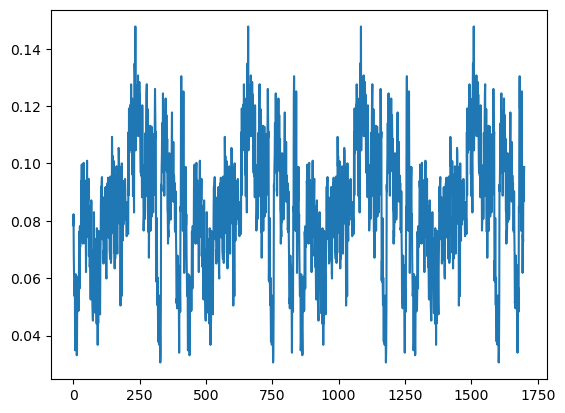

In [29]:
import matplotlib.pyplot as plt

plt.plot(ds.headers['ATMOS_R0'])
plt.show()

Dataset tracks information about the individual files that make up the dataset in the files attribute.

In [30]:
ds.files

FileManager containing 1700 files with each array having shape (1, 980, 2554)

In [31]:
ds.files.filenames[:10]

['VISP_2023_10_16T18_21_47_508_00630200_I_BKPLX_L1.fits',
 'VISP_2023_10_16T18_21_50_326_00630200_I_BKPLX_L1.fits',
 'VISP_2023_10_16T18_21_53_144_00630200_I_BKPLX_L1.fits',
 'VISP_2023_10_16T18_21_55_962_00630200_I_BKPLX_L1.fits',
 'VISP_2023_10_16T18_21_58_780_00630200_I_BKPLX_L1.fits',
 'VISP_2023_10_16T18_22_01_597_00630200_I_BKPLX_L1.fits',
 'VISP_2023_10_16T18_22_04_415_00630200_I_BKPLX_L1.fits',
 'VISP_2023_10_16T18_22_07_233_00630200_I_BKPLX_L1.fits',
 'VISP_2023_10_16T18_22_10_051_00630200_I_BKPLX_L1.fits',
 'VISP_2023_10_16T18_22_12_869_00630200_I_BKPLX_L1.fits']

## Downloading FITS Data
Let's go back to using our VBI dataset. The next section assumes you have running Globus Connect Personal. You will need to do this to download FITS data to your machines. See the [Downloading Data](https://docs.dkist.nso.edu/projects/python-tools/en/stable/tutorial/5_downloading_data.html) section of the User Tools documentation to understand what you need to do. 
* If we know that we will want to download an entire dataset, there are the several ways to do this. We can do this by using the full dataset object.

In [32]:
res = Fido.search(a.dkist.Dataset("AJQWW"))
asdf_file = Fido.fetch(res, path="~/DKISTDownloads/Workshop/{instrument}/{dataset_id}")

# We extract the top left tile of the VBI mosaic
ds = dkist.load_dataset(asdf_file)[0, 0]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/alisdair/anaconda3/anaconda3/lib/python3.12/site-packages/asdf/_asdf.py:310: AsdfPackageVersionWarning: File 'file:///Users/alisdair/DKISTDownloads/Workshop/VBI/AJQWW/VBI_L1_20231016T184519_AJQWW_metadata.asdf' was created with extension URI 'asdf://asdf-format.org/astronomy/gwcs/extensions/gwcs-1.2.0' (from package gwcs==0.24.0), but older package (gwcs==0.21.0) is installed.
  warnings.warn(msg, AsdfPackageVersionWarning)


With the User Tools there is also the possibity of downloading subsets of files rather than the whole dataset.

In [33]:
ds[0, 0].files.download()

2025-02-21 13:53:41 - globus_sdk.client - INFO: Creating client of type <class 'globus_sdk.services.auth.client.native_client.NativeAppAuthClient'> for service "auth"
2025-02-21 13:53:41 - globus_sdk.services.auth.client.base_login_client - INFO: Finished initializing AuthLoginClient. client_id='dd2d62af-0b44-4e2e-9454-1092c94b46b3', type(authorizer)=<class 'globus_sdk.authorizers.base.NullAuthorizer'>
2025-02-21 13:53:41 - globus_sdk.authorizers.refresh_token - INFO: Setting up RefreshTokenAuthorizer with auth_client=[instance:6055927904]
2025-02-21 13:53:41 - globus_sdk.authorizers.renewing - INFO: Setting up a RenewingAuthorizer. It will use an auth type of Bearer and can handle 401s.
2025-02-21 13:53:41 - globus_sdk.authorizers.renewing - INFO: RenewingAuthorizer will start by using access_token with hash "7fbacf7d9d10e862a1bfaad90c6eb11d38d15259d740c8552ca1326b1477376a"
2025-02-21 13:53:41 - globus_sdk.authorizers.refresh_token - INFO: Setting up RefreshTokenAuthorizer with auth_c

|                                                                | 0/? [?file/s]

2025-02-21 13:53:42 - globus_sdk.services.transfer.client - INFO: TransferClient.task_event_list(ef2658a5-f095-11ef-9842-0207be7ee3a1, ...)
2025-02-21 13:53:43 - globus_sdk.transport.requests - INFO: request done (success)
2025-02-21 13:53:43 - globus_sdk.services.transfer.client - INFO: TransferClient.get_task(ef2658a5-f095-11ef-9842-0207be7ee3a1, ...)
2025-02-21 13:53:43 - globus_sdk.transport.requests - INFO: request done (success)


PENDING: Starting Transfer


2025-02-21 13:53:48 - globus_sdk.services.transfer.client - INFO: TransferClient.task_event_list(ef2658a5-f095-11ef-9842-0207be7ee3a1, ...)
2025-02-21 13:53:48 - globus_sdk.transport.requests - INFO: request done (success)
2025-02-21 13:53:48 - globus_sdk.services.transfer.client - INFO: TransferClient.get_task(ef2658a5-f095-11ef-9842-0207be7ee3a1, ...)
2025-02-21 13:53:48 - globus_sdk.transport.requests - INFO: request done (success)
2025-02-21 13:53:53 - globus_sdk.services.transfer.client - INFO: TransferClient.task_event_list(ef2658a5-f095-11ef-9842-0207be7ee3a1, ...)
2025-02-21 13:53:53 - globus_sdk.transport.requests - INFO: request done (success)
2025-02-21 13:53:53 - globus_sdk.services.transfer.client - INFO: TransferClient.get_task(ef2658a5-f095-11ef-9842-0207be7ee3a1, ...)
2025-02-21 13:53:53 - globus_sdk.transport.requests - INFO: request done (success)


Task completed with SUCCEEDED status.


And if we plot the top left tile, we get

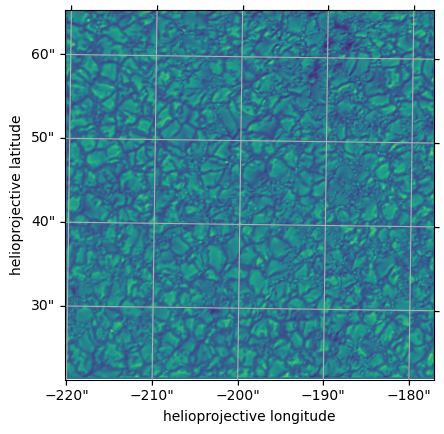

In [34]:
ax = ds[0].plot()
ax.grid(True)

# Stitching a VBI Mosaic with reproject

In [35]:
res = Fido.search(a.dkist.Dataset("AJQWW"))
asdf_file = Fido.fetch(res, path="~/DKISTDownloads/Workshop/{instrument}/{dataset_id}")

# We extract the top left tile of the VBI mosaic
ds = dkist.load_dataset(asdf_file)
ds

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/alisdair/anaconda3/anaconda3/lib/python3.12/site-packages/asdf/_asdf.py:310: AsdfPackageVersionWarning: File 'file:///Users/alisdair/DKISTDownloads/Workshop/VBI/AJQWW/VBI_L1_20231016T184519_AJQWW_metadata.asdf' was created with extension URI 'asdf://asdf-format.org/astronomy/gwcs/extensions/gwcs-1.2.0' (from package gwcs==0.24.0), but older package (gwcs==0.21.0) is installed.
  warnings.warn(msg, AsdfPackageVersionWarning)


This VBI Dataset AJQWW is an array of (3, 3) Dataset objects and
consists of 27 frames.
Files are stored in /Users/alisdair/DKISTDownloads/Workshop/VBI/AJQWW

Each Dataset has 3 pixel and 3 world dimensions.

The data are represented by a <class 'dask.array.core.Array'> object:
dask.array<reshape, shape=(3, 4096, 4096), dtype=float32, chunksize=(1, 4096, 4096), chunktype=numpy.ndarray>

Array Dim  Axis Name                  Data size  Bounds
        0  time                               3  None
        1  helioprojective latitude        4096  None
        2  helioprojective longitude       4096  None

World Dim  Axis Name                  Physical Type                   Units
        2  time                       time                            s
        1  helioprojective latitude   custom:pos.helioprojective.lat  arcsec
        0  helioprojective longitude  custom:pos.helioprojective.lon  arcsec

Correlation between pixel and world axes:

                          |                  

We know we want the whole dataset so we can do

In [36]:
dkist.net.transfer_complete_datasets('AJQWW', path="~/DKISTDownloads/Workshop/{instrument}/{dataset_id}")

2025-02-21 13:56:42 - globus_sdk.client - INFO: Creating client of type <class 'globus_sdk.services.auth.client.native_client.NativeAppAuthClient'> for service "auth"
2025-02-21 13:56:42 - globus_sdk.services.auth.client.base_login_client - INFO: Finished initializing AuthLoginClient. client_id='dd2d62af-0b44-4e2e-9454-1092c94b46b3', type(authorizer)=<class 'globus_sdk.authorizers.base.NullAuthorizer'>
2025-02-21 13:56:42 - globus_sdk.authorizers.refresh_token - INFO: Setting up RefreshTokenAuthorizer with auth_client=[instance:6085692784]
2025-02-21 13:56:42 - globus_sdk.authorizers.renewing - INFO: Setting up a RenewingAuthorizer. It will use an auth type of Bearer and can handle 401s.
2025-02-21 13:56:42 - globus_sdk.authorizers.renewing - INFO: RenewingAuthorizer will start by using access_token with hash "7fbacf7d9d10e862a1bfaad90c6eb11d38d15259d740c8552ca1326b1477376a"
2025-02-21 13:56:42 - globus_sdk.authorizers.refresh_token - INFO: Setting up RefreshTokenAuthorizer with auth_c

|                                                                | 0/? [?file/s]

2025-02-21 13:56:43 - globus_sdk.services.transfer.client - INFO: TransferClient.task_event_list(5b190ea0-f096-11ef-b1a4-0e26ca329435, ...)
2025-02-21 13:56:44 - globus_sdk.transport.requests - INFO: request done (success)
2025-02-21 13:56:44 - globus_sdk.services.transfer.client - INFO: TransferClient.get_task(5b190ea0-f096-11ef-b1a4-0e26ca329435, ...)
2025-02-21 13:56:44 - globus_sdk.transport.requests - INFO: request done (success)


PENDING: Starting Transfer


2025-02-21 13:56:49 - globus_sdk.services.transfer.client - INFO: TransferClient.task_event_list(5b190ea0-f096-11ef-b1a4-0e26ca329435, ...)
2025-02-21 13:56:49 - globus_sdk.transport.requests - INFO: request done (success)
2025-02-21 13:56:49 - globus_sdk.services.transfer.client - INFO: TransferClient.get_task(5b190ea0-f096-11ef-b1a4-0e26ca329435, ...)
2025-02-21 13:56:49 - globus_sdk.transport.requests - INFO: request done (success)
2025-02-21 13:56:54 - globus_sdk.services.transfer.client - INFO: TransferClient.task_event_list(5b190ea0-f096-11ef-b1a4-0e26ca329435, ...)
2025-02-21 13:56:54 - globus_sdk.transport.requests - INFO: request done (success)
2025-02-21 13:56:54 - globus_sdk.services.transfer.client - INFO: TransferClient.get_task(5b190ea0-f096-11ef-b1a4-0e26ca329435, ...)
2025-02-21 13:56:54 - globus_sdk.transport.requests - INFO: request done (success)


Task completed with SUCCEEDED status.


[PosixPath('~/DKISTDownloads/Workshop/VBI/AJQWW')]

This gives us a dkist.TiledDataset object, which is an array of dkist.Dataset objects, as this VBI dataset is tiled in space (or mosaiced).
We can now make a composite plot of all the tiles, at the first timestep.

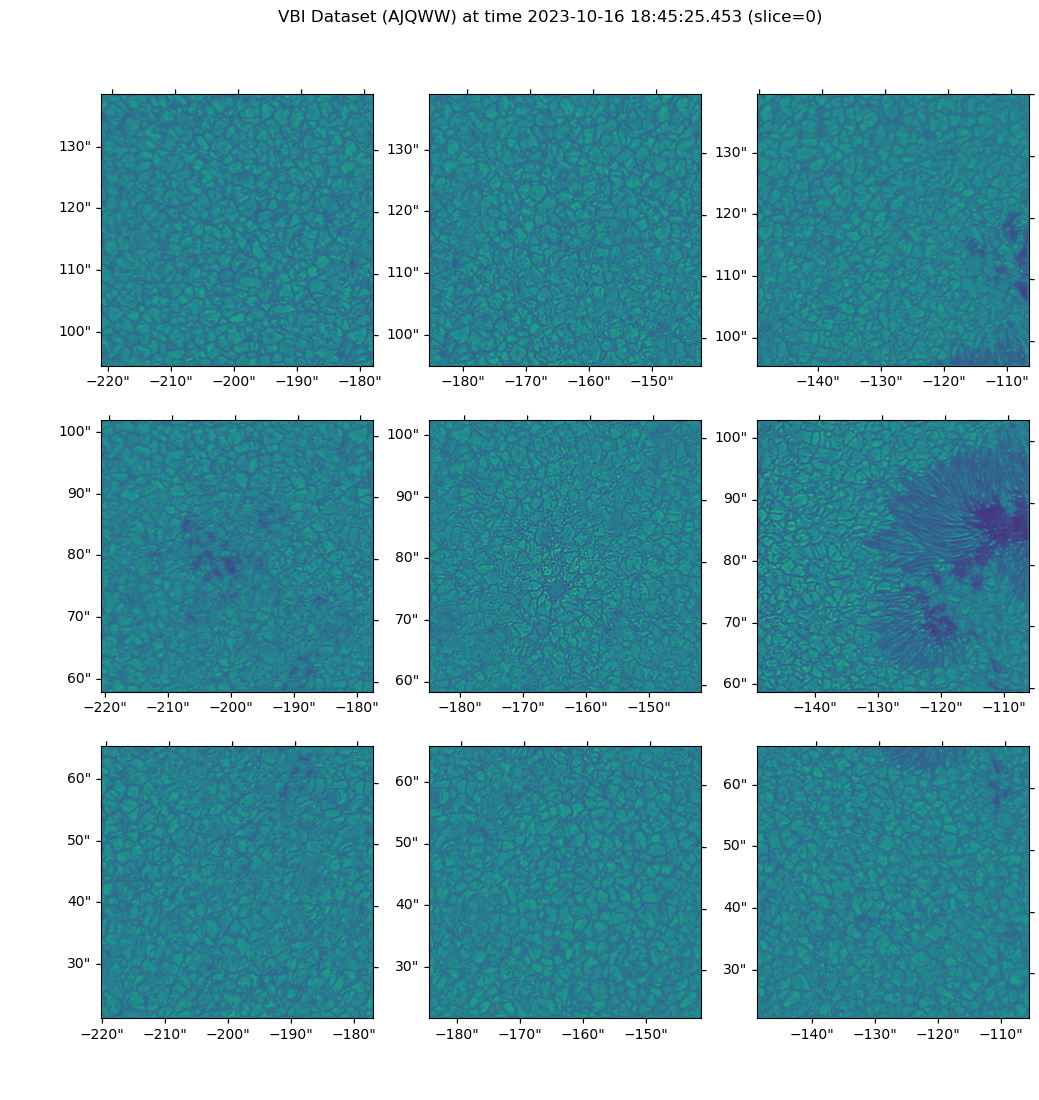

In [37]:
import numpy as np
import dkist

fig = plt.figure(figsize=(12, 12))
fig = ds.plot(slice_index=0, share_zscale=True)